<a href="https://colab.research.google.com/github/ankushjana29/github-slideshow/blob/master/analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import os
import librosa as lr
import librosa.display
import pandas as pd
import IPython.display as ipd
from librosa.display import specshow
import sklearn
from sklearn import preprocessing

In [2]:
audio1="/home/Asian_Koel.010.wav"
audio2="/home/Asian_Koel.011.wav"
audio3="/home/Asian_Koel.012.wav"

In [3]:
ipd.Audio(audio1)

In [4]:
ipd.Audio(audio2)

In [5]:
ipd.Audio(audio3)

In [7]:
aud1,sr=lr.load(audio1)

print(f'shape aud1:{aud1.shape}')
print(f'sr:{sr}')

shape aud1:(220500,)
sr:22050


In [8]:
aud2,sr=lr.load(audio2)

print(f'shape aud2:{aud2.shape}')
print(f'sr:{sr}')

shape aud2:(220500,)
sr:22050


In [9]:
aud3,sr=lr.load(audio3)

print(f'shape aud2:{aud2.shape}')
print(f'sr:{sr}')

shape aud2:(220500,)
sr:22050


In [10]:
aud1, _ =lr.load(audio1)
aud2, _=lr.load(audio2)
aud3, _=lr.load(audio3)

In [ ]:
print(aud1)

[-0.01104803 -0.01345816 -0.00954506 ... -0.00411515 -0.00701392
 -0.00530714]


In [11]:
FRAME_LENGTH=1024
HOP_LENGTH=512

rms_aud1=lr.feature.rms(y=aud1,frame_length=FRAME_LENGTH,hop_length=HOP_LENGTH)
rms_aud2=lr.feature.rms(y=aud2,frame_length=FRAME_LENGTH,hop_length=HOP_LENGTH)
rms_aud3=lr.feature.rms(y=aud3,frame_length=FRAME_LENGTH,hop_length=HOP_LENGTH)

In [ ]:
help(lr.feature.rms)

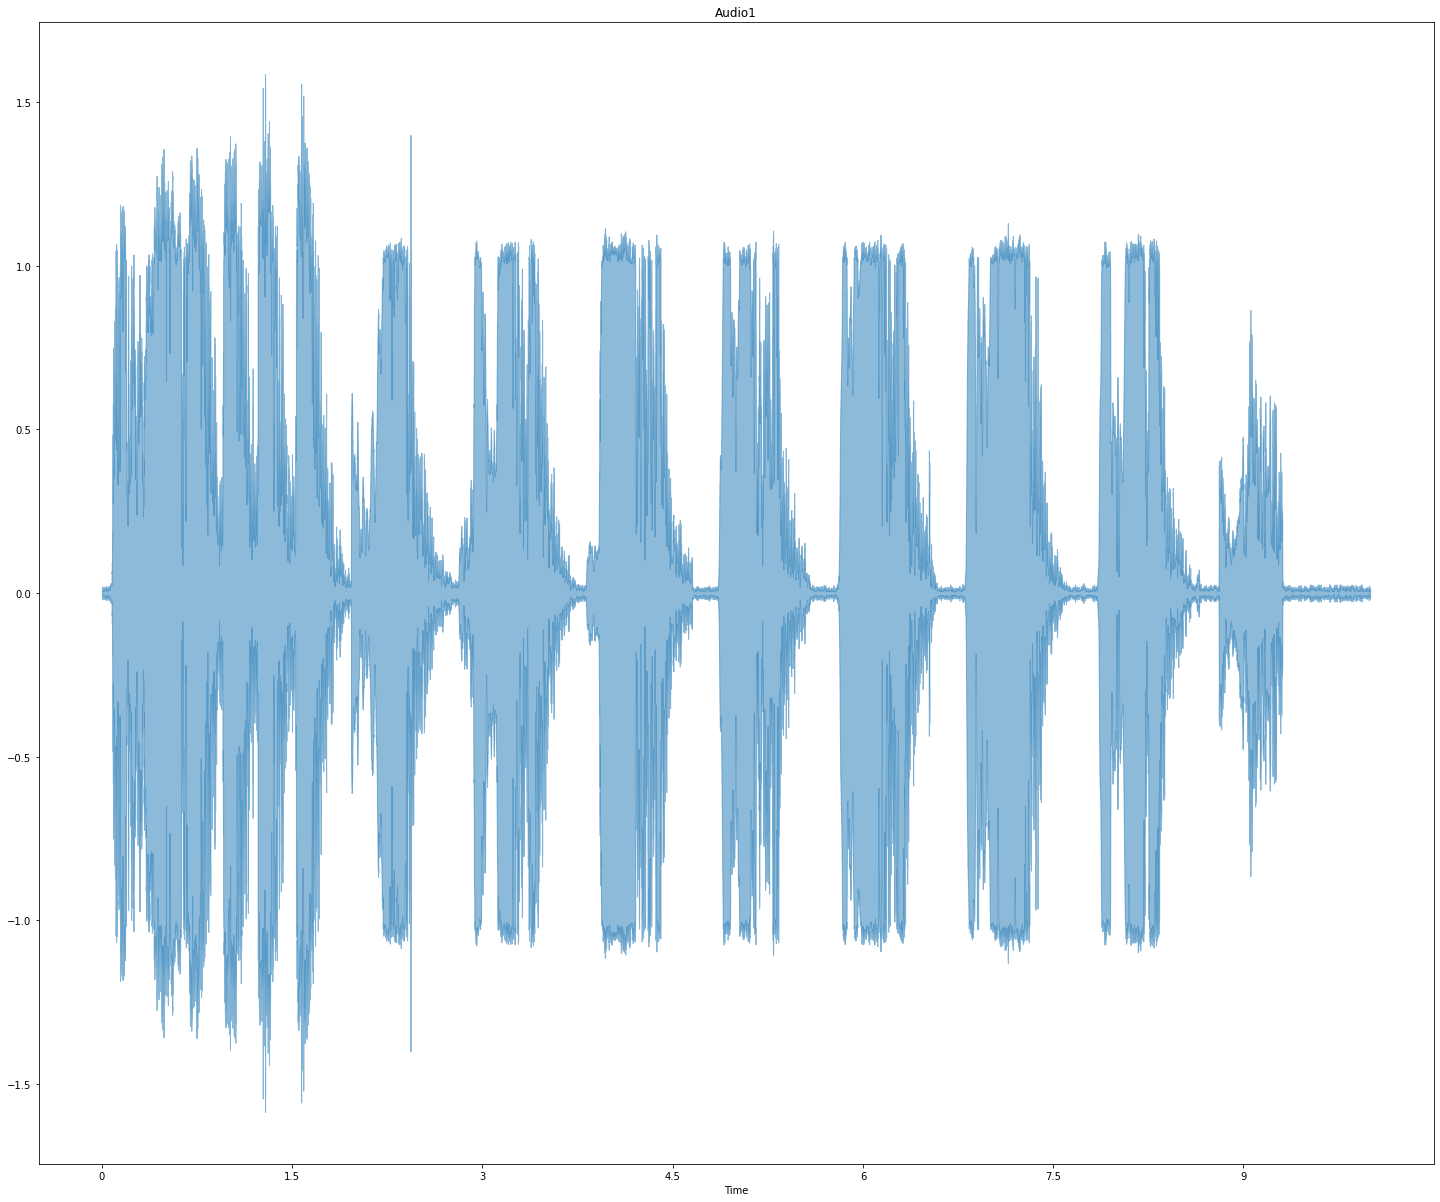

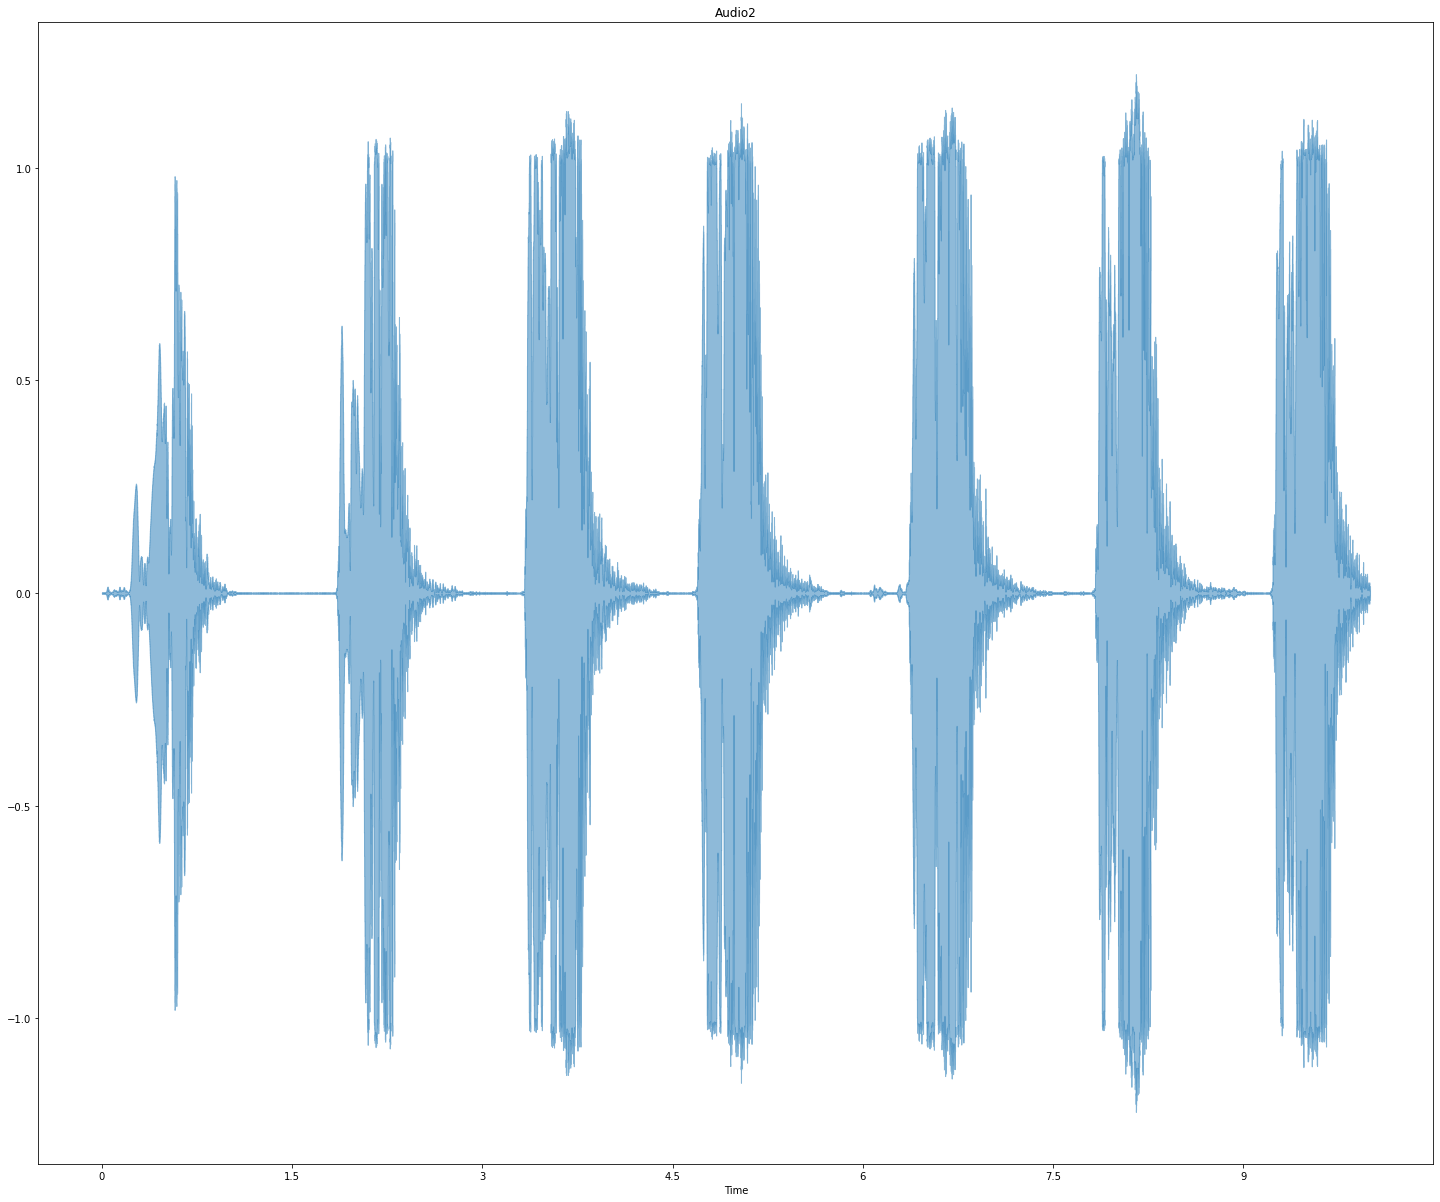

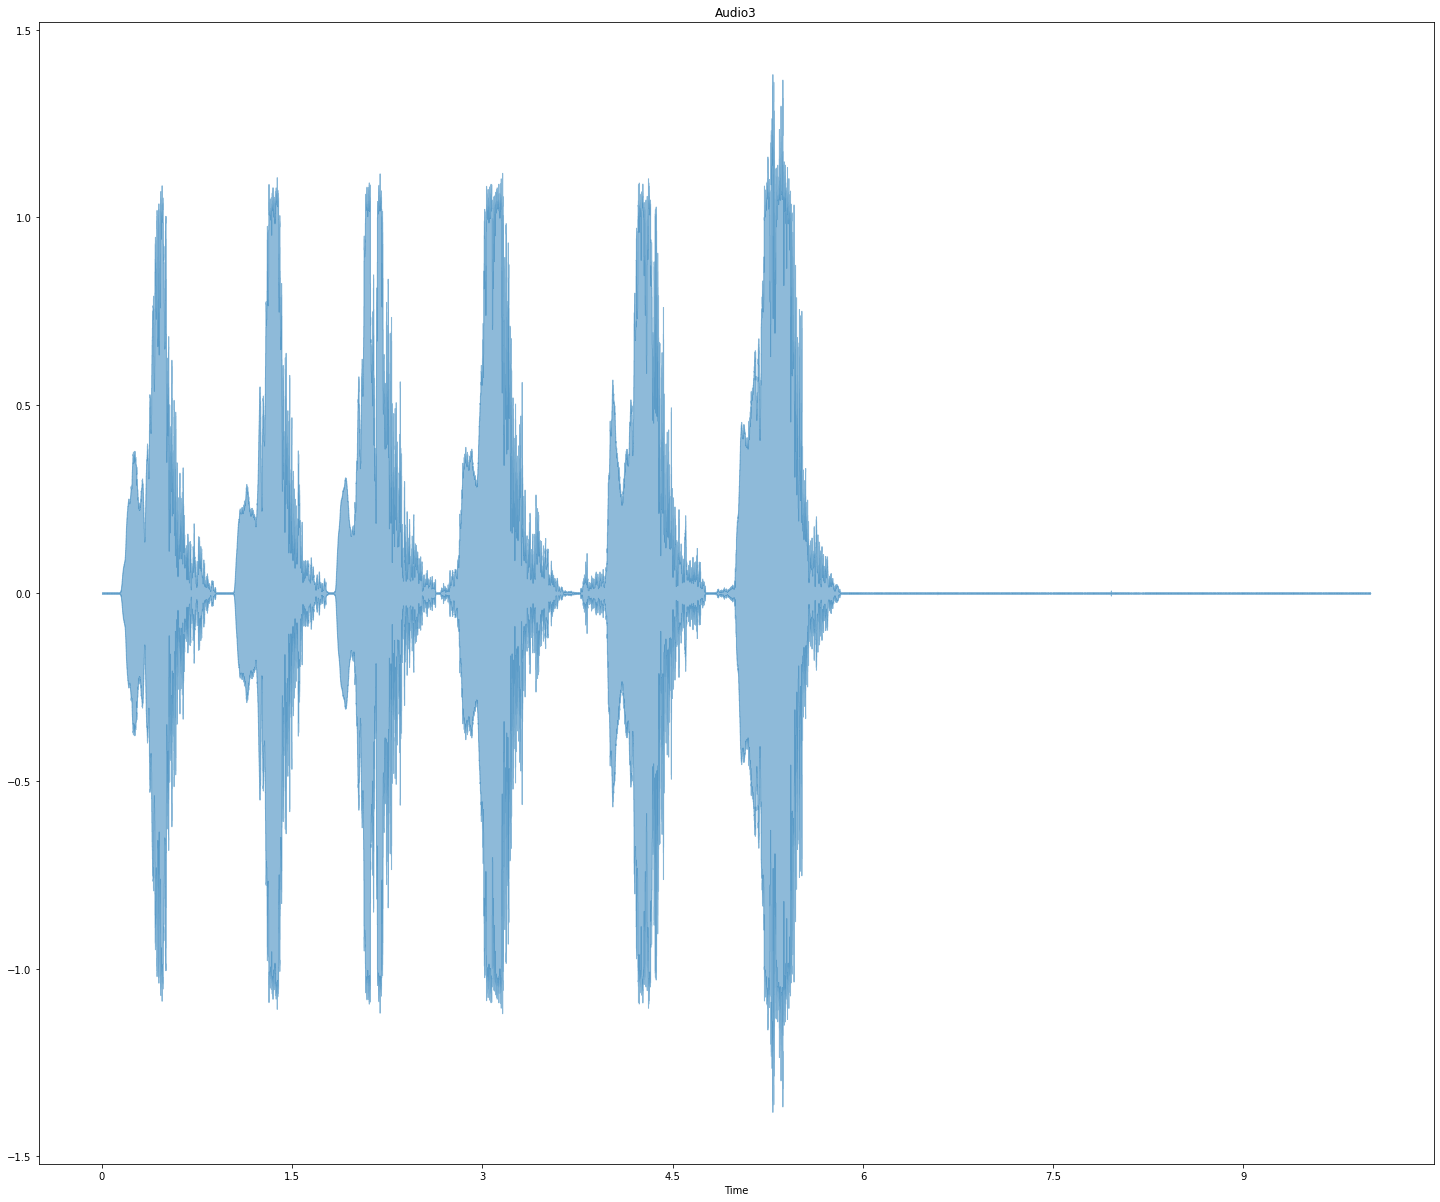

In [15]:
frames=range(len(rms_aud1))
t=lr.frames_to_time(frames,hop_length=HOP_LENGTH)

plt.figure(figsize=(25,21))


lr.display.waveshow(aud1,alpha=0.5)
plt.plot(t,rms_aud1,color="g")
plt.title("Audio1")
plt.ylim=([-1,1])


plt.figure(figsize=(25,21))

lr.display.waveshow(aud2,alpha=0.5)
plt.plot(t,rms_aud1,color="r")
plt.title("Audio2")
plt.ylim=([-1,1])

plt.figure(figsize=(25,21))

lr.display.waveshow(aud3,alpha=0.5)
plt.plot(t,rms_aud3,color="r")
plt.title("Audio3")
plt.ylim=([-1,1])


plt.show()

rms

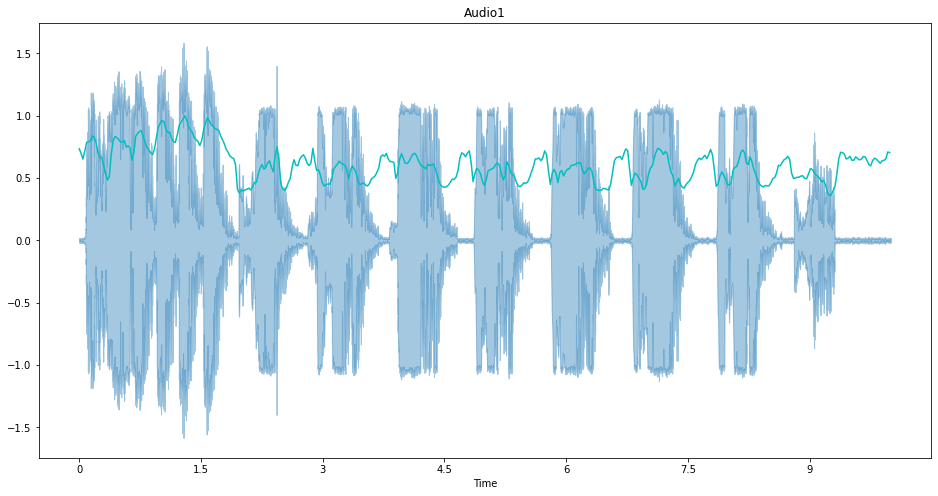

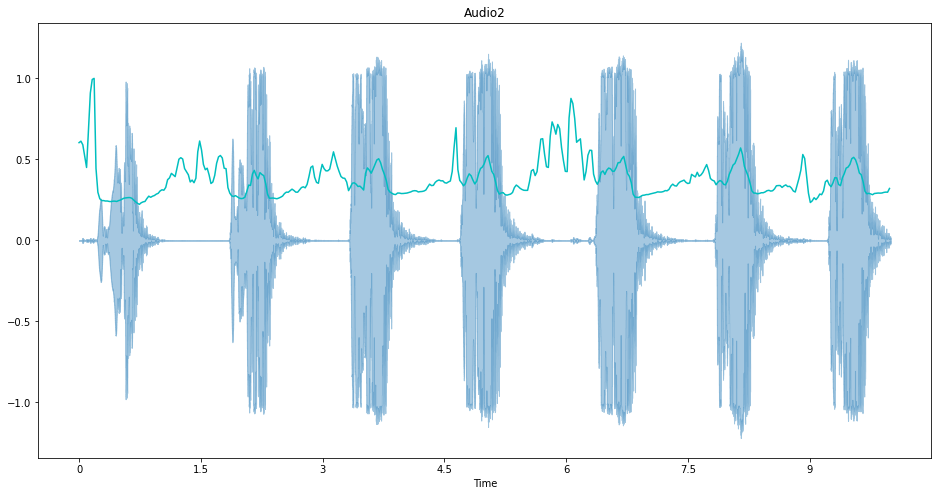

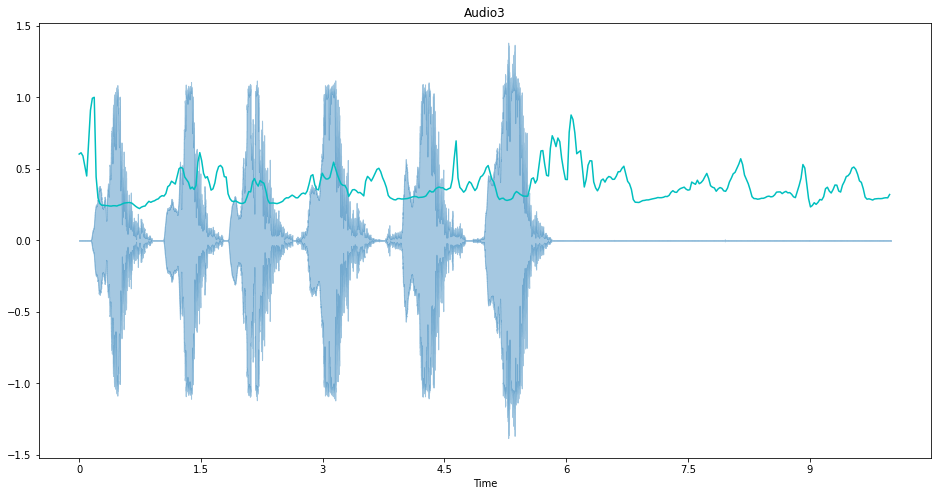

In [20]:
x,sr=lr.load(audio1)
z,sr=lr.load(audio2)
f,sr=lr.load(audio3)

spectral_centroids = lr.feature.spectral_centroid(y=x, sr = sr)[0]

plt.figure(figsize = (16, 8))
frames = range(len(spectral_centroids))
t = lr.frames_to_time(frames)

def normalize(x, axis = 0):
  return sklearn.preprocessing.minmax_scale(x, axis = axis)


plt.title("Audio1")

lr.display.waveshow(x, sr = sr, alpha = 0.4)
#plt.plot(t, normalize(spectral_centroids), color = 'c')
plt.plot(t, librosa.util.normalize(spectral_centroids), color = 'c')

spectral_centroids = lr.feature.spectral_centroid(y=z, sr = sr)[0]

plt.figure(figsize = (16, 8))
frames = range(len(spectral_centroids))
t = lr.frames_to_time(frames)

def normalize(z, axis = 0):
  return sklearn.preprocessing.minmax_scale(z, axis = axis)


plt.title("Audio2")
lr.display.waveshow(z, sr = sr, alpha = 0.4)
#plt.plot(t, normalize(spectral_centroids), color = 'c')
plt.plot(t, librosa.util.normalize(spectral_centroids), color = 'c')


plt.figure(figsize = (16, 8))
frames = range(len(spectral_centroids))
t = lr.frames_to_time(frames)

plt.title("Audio3")
lr.display.waveshow(f, sr = sr, alpha = 0.4)
#plt.plot(t, normalize(spectral_centroids), color = 'c')
plt.plot(t, librosa.util.normalize(spectral_centroids), color = 'c')

spectral centriod

Text(0.5, 1.0, 'Audio3')

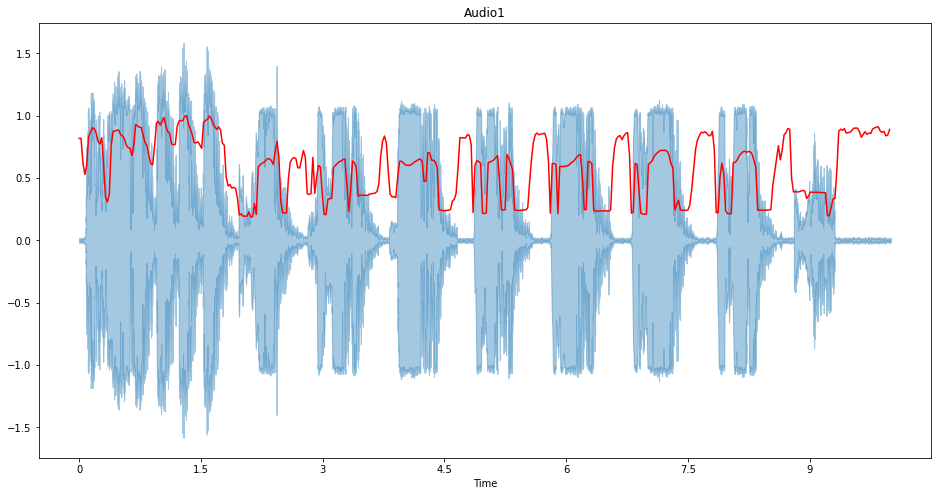

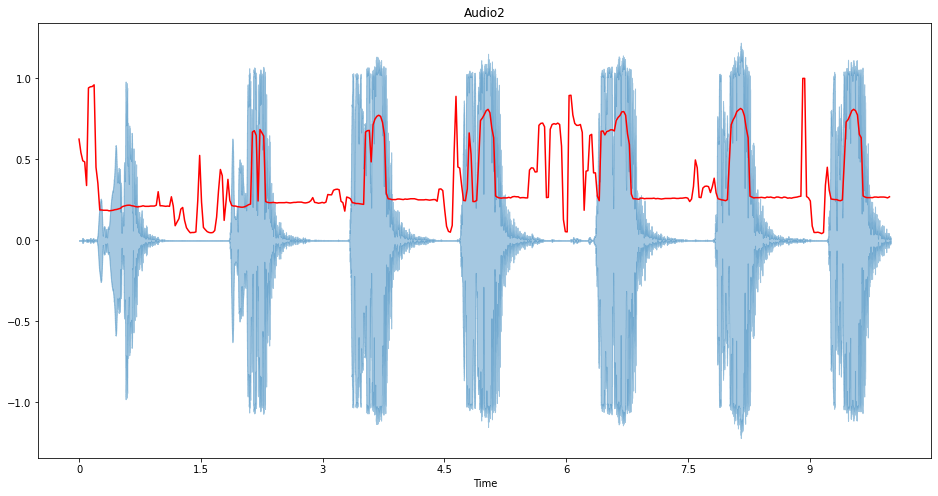

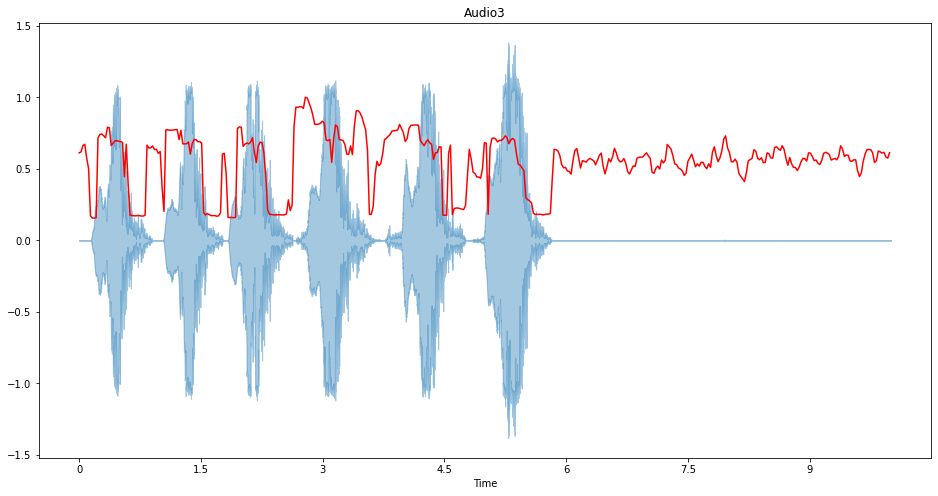

In [21]:
spectral_rolloff = lr.feature.spectral_rolloff(y=x + 0.01, sr = sr)[0]
plt.figure(figsize = (16, 8))
lr.display.waveshow(x, sr = sr, alpha = 0.4)
#plt.plot(t, normalize(spectral_rolloff), color = 'r')
plt.plot(t, librosa.util.normalize(spectral_rolloff), color = 'r')
plt.title("Audio1")

spectral_rolloff = lr.feature.spectral_rolloff(y=z + 0.01, sr = sr)[0]
plt.figure(figsize = (16, 8))
lr.display.waveshow(z, sr = sr, alpha = 0.4)
#plt.plot(t, normalize(spectral_rolloff), color = 'r')
plt.plot(t, librosa.util.normalize(spectral_rolloff), color = 'r')
plt.title("Audio2")

spectral_rolloff = lr.feature.spectral_rolloff(y=f + 0.01, sr = sr)[0]
plt.figure(figsize = (16, 8))
lr.display.waveshow(f, sr = sr, alpha = 0.4)
#plt.plot(t, normalize(spectral_rolloff), color = 'r')
plt.plot(t, librosa.util.normalize(spectral_rolloff), color = 'r')
plt.title("Audio3")

In [ ]:
help(lr.feature.spectral_rolloff)

spectral roll off

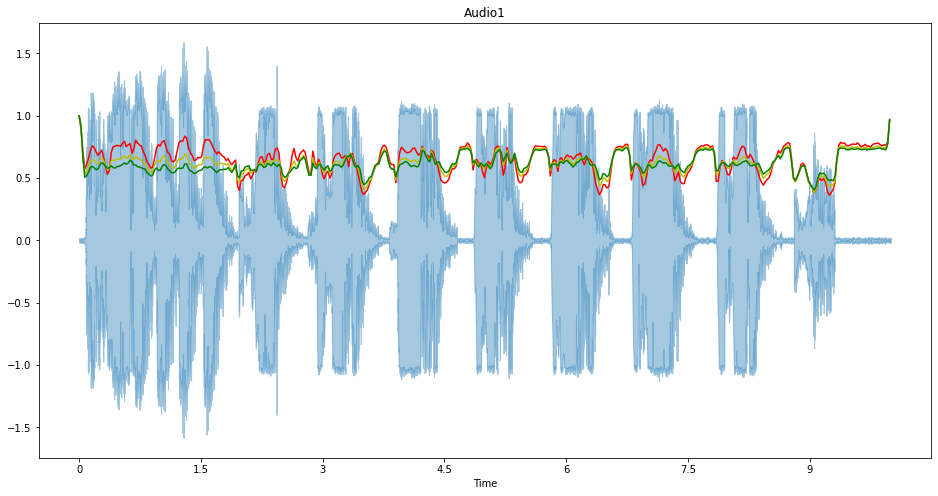

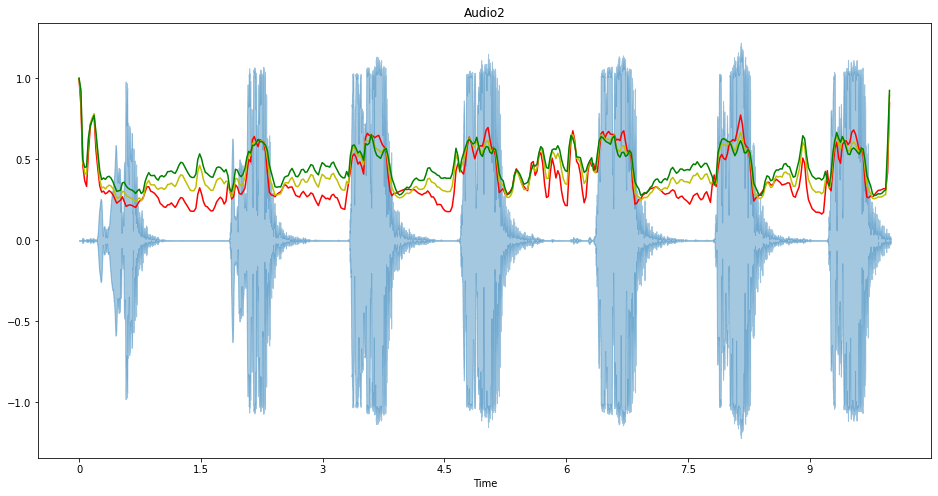

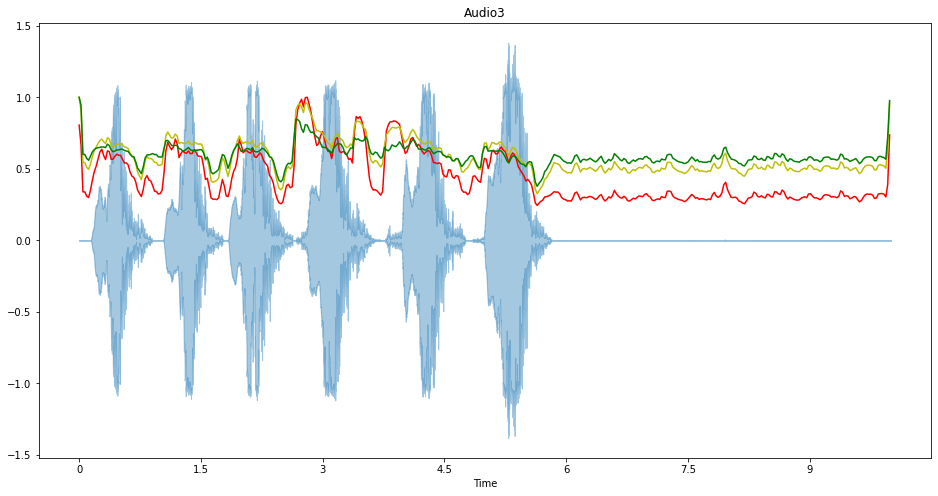

In [22]:
spectral_bandwidth_2 = lr.feature.spectral_bandwidth(y=x + 0.11, sr = sr)[0]
spectral_bandwidth_3 = lr.feature.spectral_bandwidth(y=x + 0.11, sr = sr, p = 3)[0]
spectral_bandwidth_4 = lr.feature.spectral_bandwidth(y=x + 0.11, sr = sr, p = 4)[0]


plt.figure(figsize = (16, 8))
lr.display.waveshow(x, sr = sr, alpha = 0.4)
plt.plot(t, librosa.util.normalize(spectral_bandwidth_2), color = 'r')
plt.plot(t, librosa.util.normalize(spectral_bandwidth_3), color = 'y')
plt.plot(t, librosa.util.normalize(spectral_bandwidth_4), color = 'g')
plt.title("Audio1")

spectral_bandwidth_2 = lr.feature.spectral_bandwidth(y=z + 0.11, sr = sr)[0]
spectral_bandwidth_3 = lr.feature.spectral_bandwidth(y=z + 0.11, sr = sr, p = 3)[0]
spectral_bandwidth_4 = lr.feature.spectral_bandwidth(y=z + 0.11, sr = sr, p = 4)[0]

plt.figure(figsize = (16, 8))
lr.display.waveshow(z, sr = sr, alpha = 0.4)
plt.plot(t, librosa.util.normalize(spectral_bandwidth_2), color = 'r')
plt.plot(t, librosa.util.normalize(spectral_bandwidth_3), color = 'y')
plt.plot(t, librosa.util.normalize(spectral_bandwidth_4), color = 'g')
plt.title("Audio2")


spectral_bandwidth_2 = lr.feature.spectral_bandwidth(y=f + 0.11, sr = sr)[0]
spectral_bandwidth_3 = lr.feature.spectral_bandwidth(y=f + 0.11, sr = sr, p = 3)[0]
spectral_bandwidth_4 = lr.feature.spectral_bandwidth(y=f + 0.11, sr = sr, p = 4)[0]

plt.figure(figsize = (16, 8))
lr.display.waveshow(f, sr = sr, alpha = 0.4)
plt.plot(t, librosa.util.normalize(spectral_bandwidth_2), color = 'r')
plt.plot(t, librosa.util.normalize(spectral_bandwidth_3), color = 'y')
plt.plot(t, librosa.util.normalize(spectral_bandwidth_4), color = 'g')
plt.title("Audio3")

plt.show()

soectral bandwidth

In [23]:

FRAME_SIZE=1024
HOP_LENGTH=512

def amplitude_envelope(signal,frame_size,hop_length):
  amplitude_envelope=[]

  #calculate AE for each frame
  for i in range(0,len(signal),hop_length):
    current_frame=max(signal[i:i+frame_size])
    amplitude_envelope.append(current_frame)

  return np.array(amplitude_envelope)  

def fancy_amplitude_envelope(signal,frame_size,hop_length):
  return np.array([max(signal[i:i+frame_size]) for i in range(0,signal.size,hop_length)])

In [24]:
ae_x=amplitude_envelope(x,FRAME_SIZE,HOP_LENGTH)
ae_z=amplitude_envelope(z,FRAME_SIZE,HOP_LENGTH)
ae_f=amplitude_envelope(f,FRAME_SIZE,HOP_LENGTH)

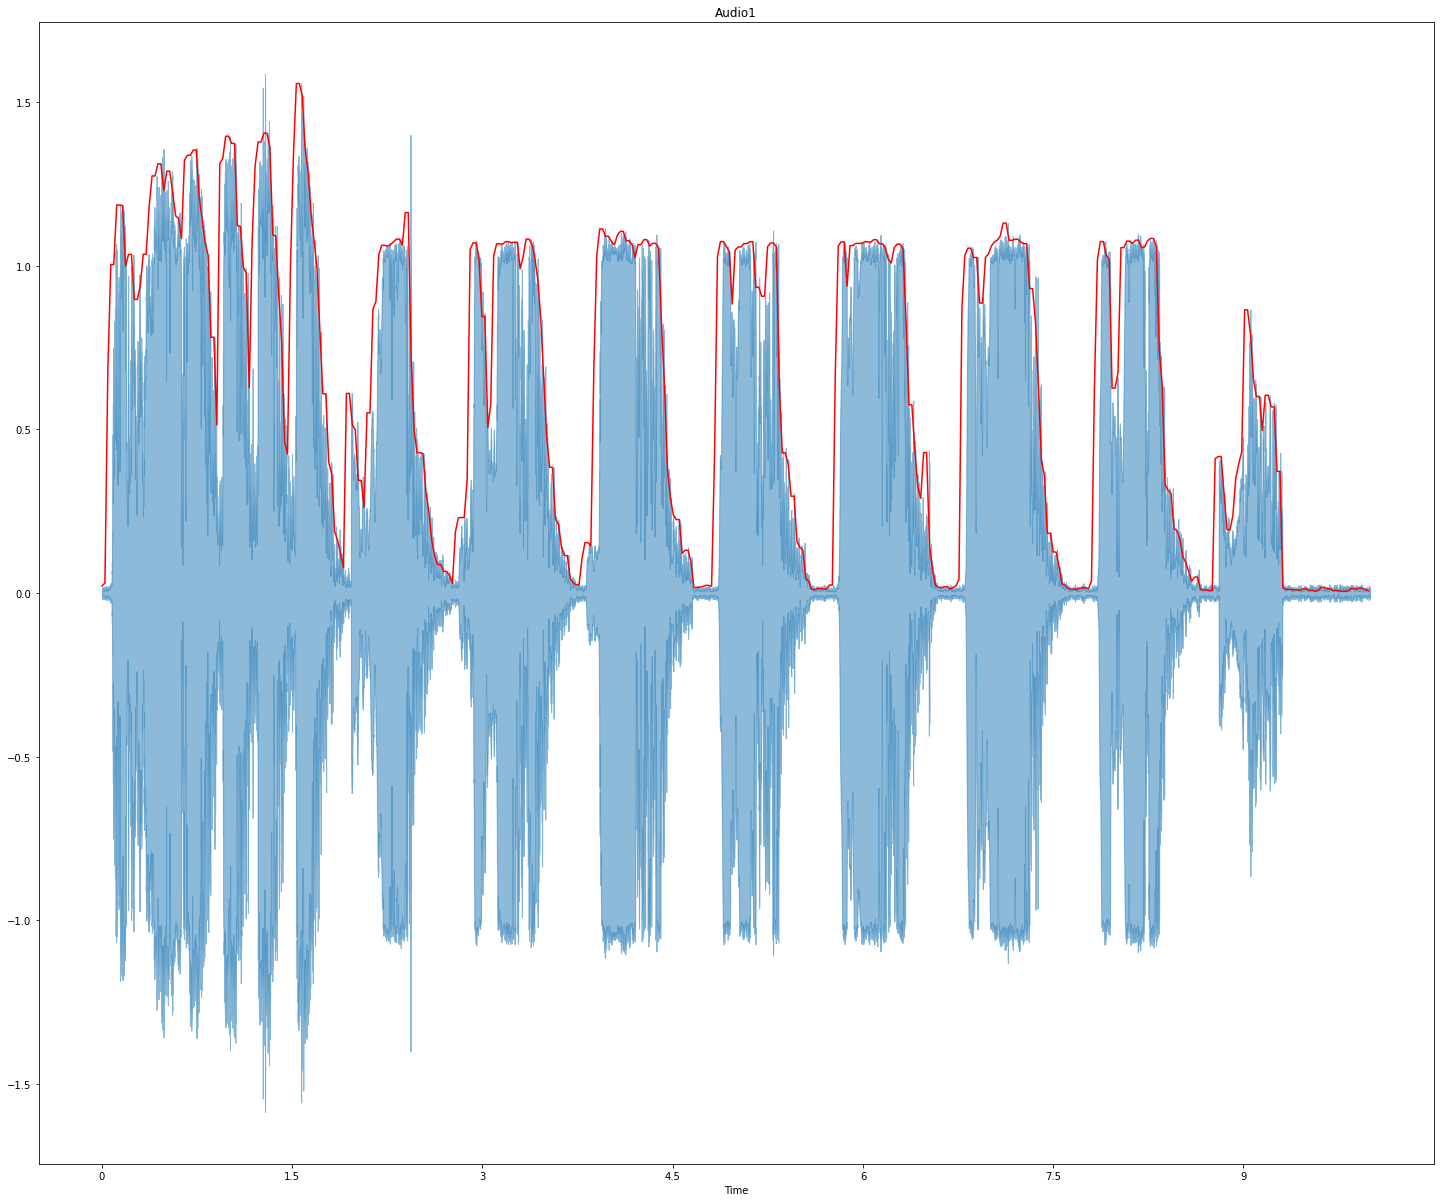

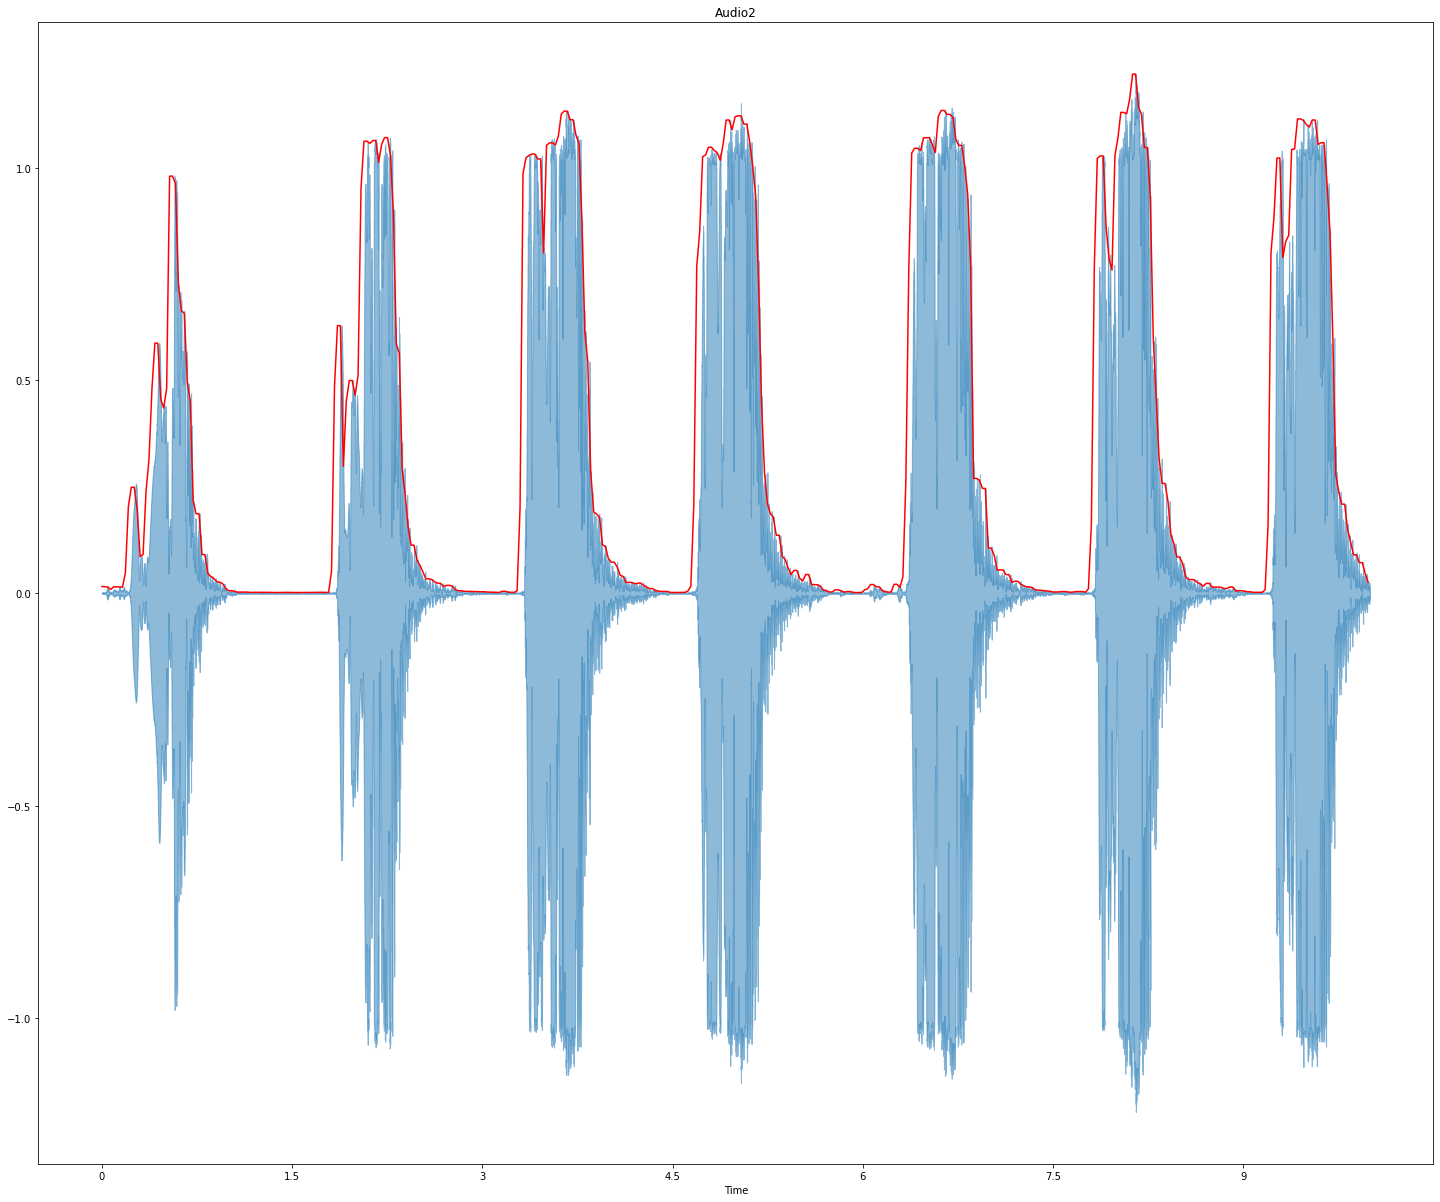

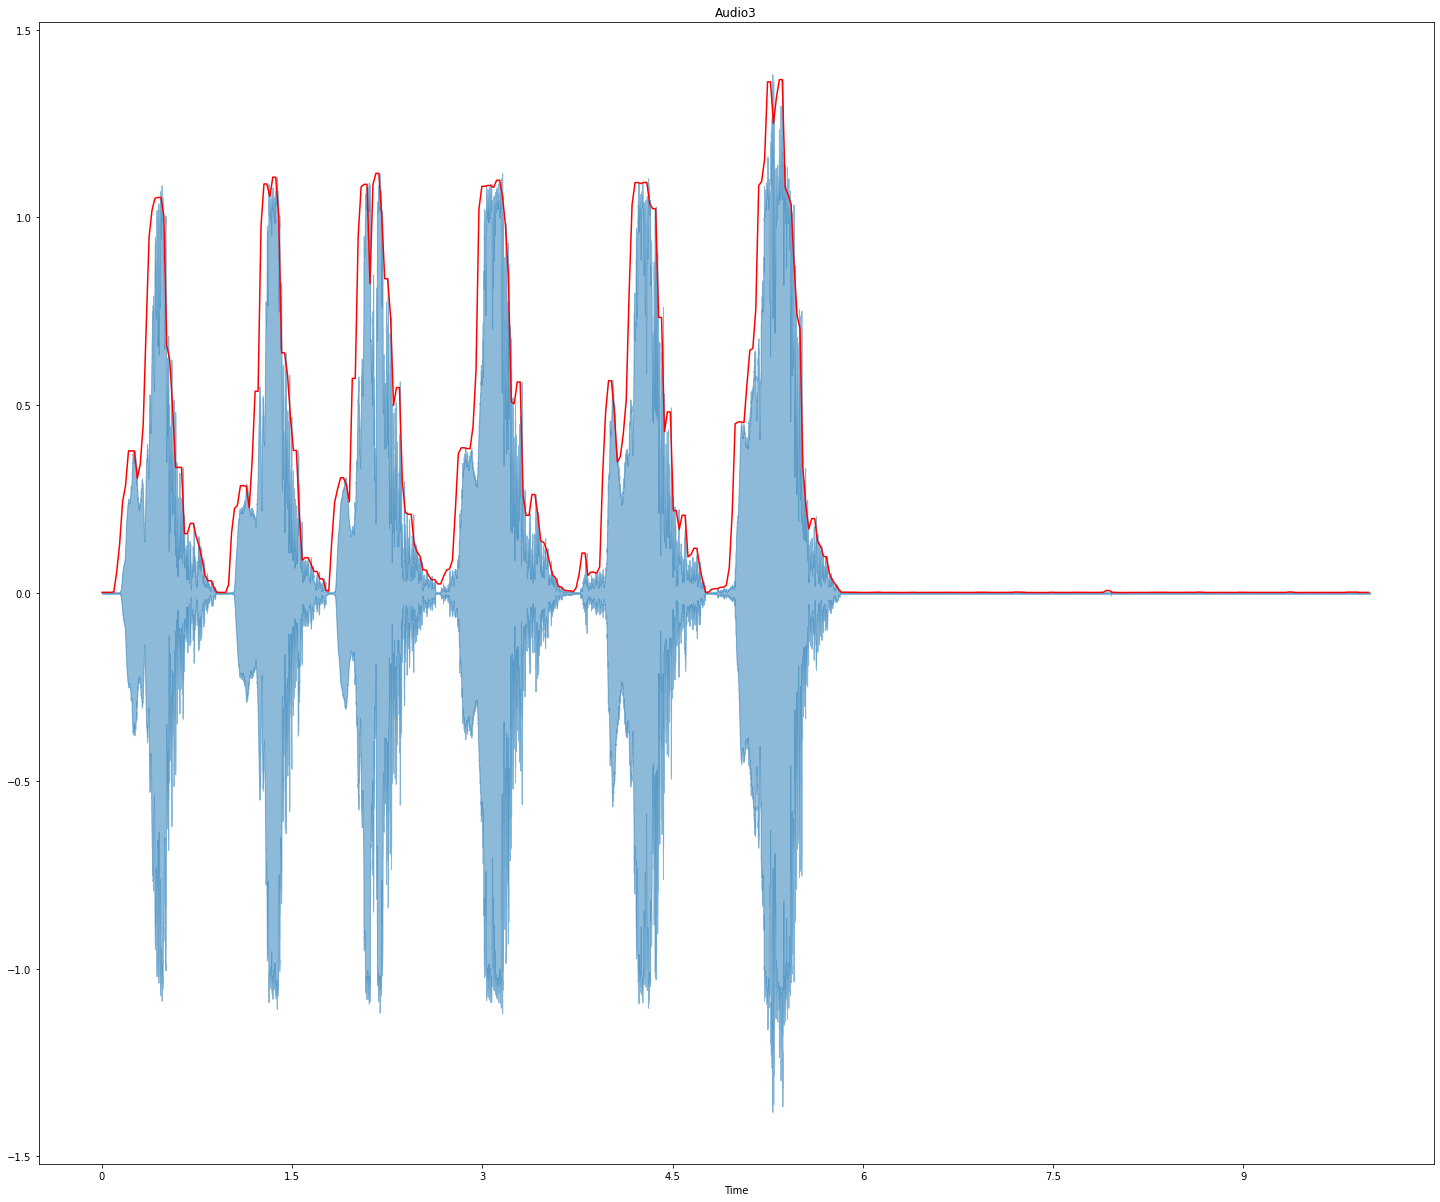

In [25]:
frames=range(0,ae_x.size)
t=lr.frames_to_time(frames,hop_length=HOP_LENGTH)

plt.figure(figsize=(25,21))


lr.display.waveshow(x,alpha=0.5)
plt.plot(t,ae_x,color="r")
plt.title("Audio1")
plt.ylim=([-1,1])

plt.figure(figsize=(25,21))


lr.display.waveshow(z,alpha=0.5)
plt.plot(t,ae_z,color="r")
plt.title("Audio2")
plt.ylim=([-1,1])

plt.figure(figsize=(25,21))

lr.display.waveshow(f,alpha=0.5)
plt.plot(t,ae_f,color="r")
plt.title("Audio3")
plt.ylim=([-1,1])


plt.show()

amplitude